# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [42]:
df = pd.read_csv('../data/states_edu.csv')
df.head()



Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [43]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.columns
#df.dropna(inplace=True)


Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [25]:
df['YEAR'].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [36]:
df_avg=df.groupby('STATE')['AVG_MATH_8_SCORE'].mean().sort_values()
df_avg

STATE
DISTRICT_OF_COLUMBIA    251.166667
ALABAMA                 264.166667
MISSISSIPPI             264.454545
LOUISIANA               265.500000
NEW_MEXICO              266.250000
WEST_VIRGINIA           268.666667
CALIFORNIA              269.166667
HAWAII                  269.583333
ARKANSAS                269.750000
TENNESSEE               272.545455
NEVADA                  272.800000
GEORGIA                 272.833333
OKLAHOMA                273.000000
FLORIDA                 273.454545
KENTUCKY                274.333333
RHODE_ISLAND            274.416667
ARIZONA                 274.666667
SOUTH_CAROLINA          275.818182
MICHIGAN                276.166667
NEW_YORK                277.083333
DELAWARE                277.181818
NATIONAL                277.769231
NORTH_CAROLINA          277.833333
ILLINOIS                278.909091
MARYLAND                278.916667
TEXAS                   279.250000
MISSOURI                279.272727
ALASKA                  280.000000
OREGON        

Find the average for your outcome score across all states in 2019

In [38]:
df.groupby('YEAR')['AVG_MATH_8_SCORE'].mean().sort_values()

YEAR
1990    263.000000
1992    266.325581
1996    270.000000
2000    271.404762
2003    276.943396
2005    277.867925
2007    280.773585
2019    281.264151
2015    281.905660
2017    282.113208
2009    282.509434
2011    283.584906
2013    284.113208
1986           NaN
1987           NaN
1988           NaN
1989           NaN
1991           NaN
1993           NaN
1994           NaN
1995           NaN
1997           NaN
1998           NaN
1999           NaN
2001           NaN
2002           NaN
2004           NaN
2006           NaN
2008           NaN
2010           NaN
2012           NaN
2014           NaN
2016           NaN
Name: AVG_MATH_8_SCORE, dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [30]:
df.groupby('STATE')['AVG_MATH_8_SCORE'].max().sort_values() 

STATE
ALABAMA                 269.0
DISTRICT_OF_COLUMBIA    269.0
LOUISIANA               273.0
NEW_MEXICO              274.0
WEST_VIRGINIA           274.0
MISSISSIPPI             274.0
CALIFORNIA              277.0
NEVADA                  278.0
ARKANSAS                279.0
OKLAHOMA                279.0
TENNESSEE               280.0
MICHIGAN                280.0
HAWAII                  281.0
GEORGIA                 281.0
FLORIDA                 281.0
KENTUCKY                282.0
SOUTH_CAROLINA          282.0
ARIZONA                 283.0
NEW_YORK                283.0
ALASKA                  283.0
RHODE_ISLAND            284.0
DELAWARE                284.0
ILLINOIS                285.0
NATIONAL                285.0
OREGON                  285.0
NORTH_CAROLINA          286.0
MISSOURI                286.0
IOWA                    286.0
UTAH                    287.0
IDAHO                   287.0
INDIANA                 288.0
NEBRASKA                288.0
MARYLAND                288.0
CONN

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [47]:
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: ** I added this feature because it is possible for a school's expenditure to impact a student's grade positively. For example, students could receive better teaching aids and use more effective technology that requires licenses**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

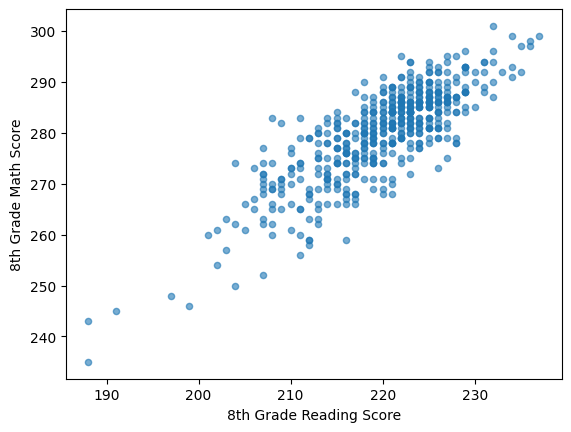

In [45]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('8th Grade Math Score')

*It seems like there is a positive correlation between 8th grade math and reading score. As 8th grade reading score increases, 8th grade math score increase as well**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

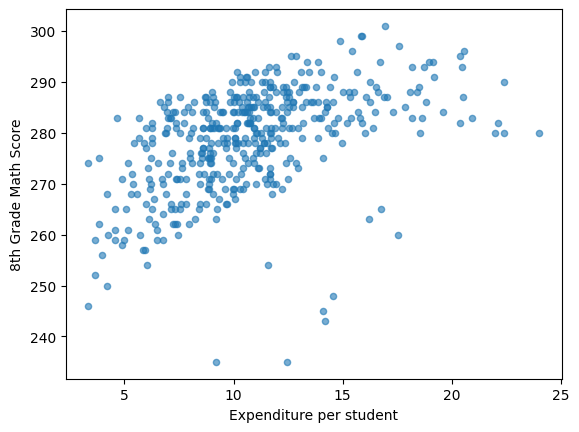

In [48]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Expenditure per student')
plt.ylabel('8th Grade Math Score')

**<It seems like as expenditure per student increases, the average 8th grade math score increases as well. However, the correlation isn't very strong.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [51]:
from sklearn.model_selection import train_test_split

In [49]:

X = df[['ENROLL_8','AVG_READING_8_SCORE','TOTAL_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [52]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [54]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [55]:
# create your model here
model = LinearRegression()

In [56]:
model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [62]:
model.score(X_test, y_test)
#model.score(X_train, y_train)

0.48429414799944426

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

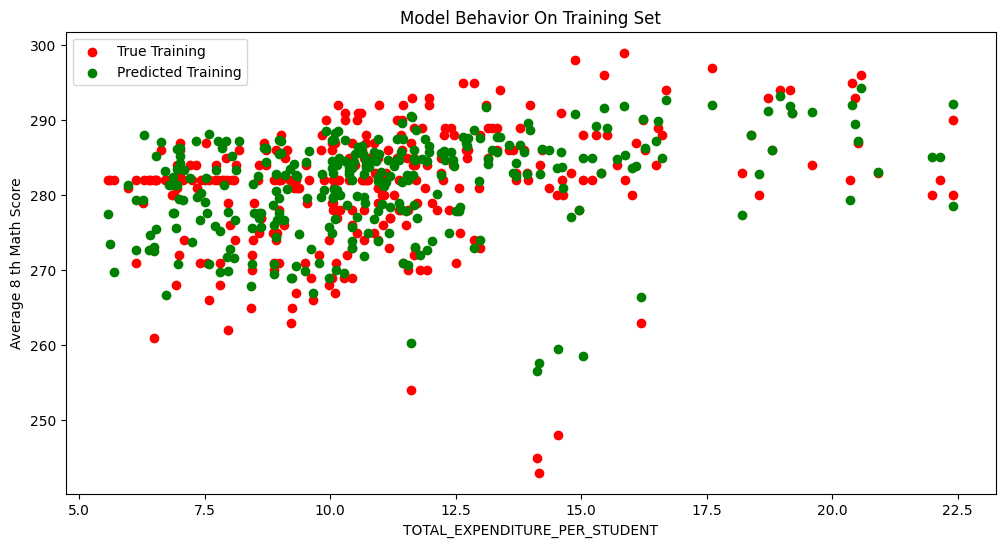

In [58]:
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 8 th Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

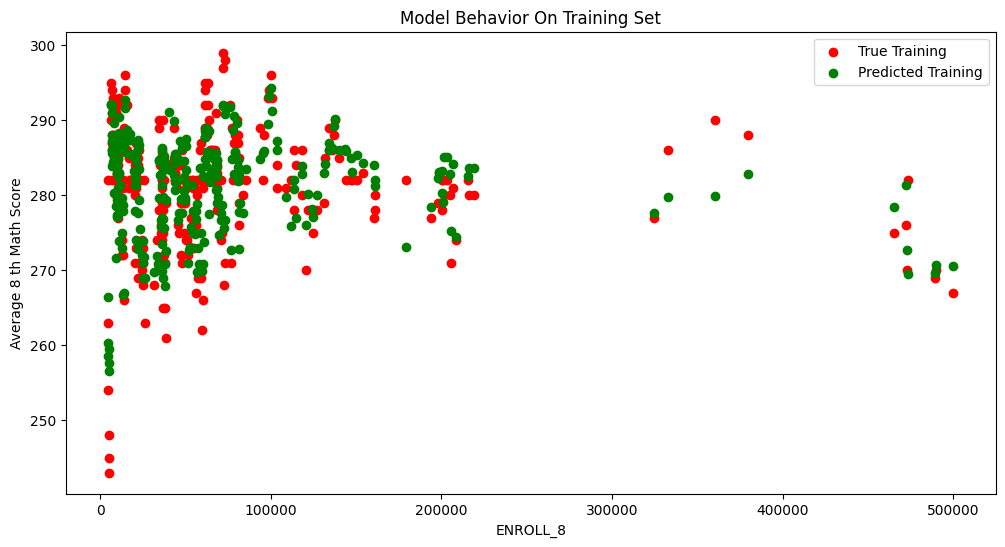

In [59]:
col_name = 'ENROLL_8'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 8 th Math Score')
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

**<This exercise is studying the correlation between enrollment number for grade 8, average reading score for 8th grade, and expenditure per student and how those variables correlate with average math score for 8th graders. The regression I run is linear regression and the R2 value for the model is around 0.48. The R2 value tells that the combination of the three predictor variables doesn't have a strong correlation with the outcome variable. Looking closer at the correlation between individual predicator variables and the outcome variable, the correlation between enrollment number for 8th grade are pretty scattered, suggesting a weak correlation between it and the avg math 8th grade score. This may explain why the R2 is low when there seems to be a noticeable correlation between avg reading score vs avg math score and expenditure per student vs. avg math score \>**